Short overview of the finite peps code. It's recommended to first check out the infinite peps code.

In [1]:
using MPSKit,PEPSKit,TensorKit,OptimKit,Plots,Test

Finite peps is a simply a 2d array. If the outward facing legs are not dim==1, then they are traced over, and you're effectively minimizing over a density matrix.

In [2]:
data = map(Iterators.product(1:10,1:10)) do (i,j)
    TensorMap(rand,ComplexF64,ℂ^2*ℂ^2*(ℂ^2)'*(ℂ^2)',(ℂ^2)')
end

peps = FinPEPS(data);

Again, you can construct the environment object

In [3]:
env = params(peps,Dmrg2(trscheme=truncdim(20),verbose=false));

and start measuring observeables

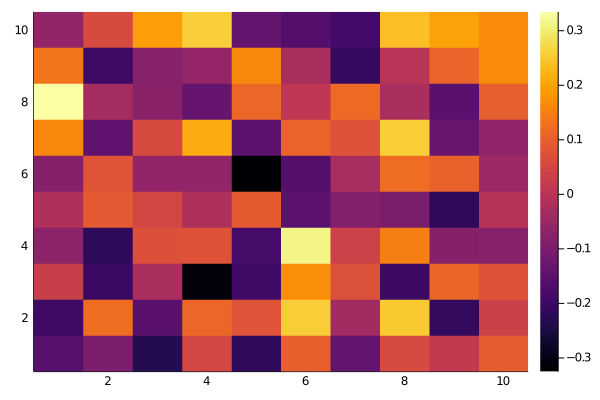

In [4]:
sz = TensorMap([1 0;0 -1],ℂ^2,ℂ^2)
heatmap(real.(expectation_value(env,sz)))

In [5]:
ham = nonsym_nn_xxz_ham();
expectation_value(env,ham)

42.18969048462521 - 2.6618836950348985e-16im

The gradient can be approximated using the channels. This is pretty fast, but the precision is fundamentally limited.

In [6]:
chan = channels(env,ham);
optalg = LBFGS(linesearch = HagerZhangLineSearch(ϵ = 1e-3,verbosity=0),maxiter=10,verbosity=20,gradtol=1e-2)
(peps,chan,delta) = find_groundstate(peps,ham,optalg,chan);

┌ Info: LBFGS: initializing with f = 4218.969048462512, ‖∇f‖ = 8.4018e+00
└ @ OptimKit /home/maarten/.julia/packages/OptimKit/2iYQz/src/lbfgs.jl:34
┌ Info: trying stepsize 1.0
└ @ PEPSKit /home/maarten/PEPSKit.jl/src/algorithms/groundstate/optimhook.jl:101
┌ Info: trying stepsize 5.0
└ @ PEPSKit /home/maarten/PEPSKit.jl/src/algorithms/groundstate/optimhook.jl:101
┌ Info: trying stepsize 25.0
└ @ PEPSKit /home/maarten/PEPSKit.jl/src/algorithms/groundstate/optimhook.jl:101
┌ Info: trying stepsize 125.0
└ @ PEPSKit /home/maarten/PEPSKit.jl/src/algorithms/groundstate/optimhook.jl:101
┌ Info: trying stepsize 625.0
└ @ PEPSKit /home/maarten/PEPSKit.jl/src/algorithms/groundstate/optimhook.jl:101
┌ Info: trying stepsize 585.4541793528279
└ @ PEPSKit /home/maarten/PEPSKit.jl/src/algorithms/groundstate/optimhook.jl:101
┌ Info: LBFGS: iter    1: f = -661.497464904192, ‖∇f‖ = 5.6853e+01, α = 5.85e+02, m = 0, nfg = 6
└ @ OptimKit /home/maarten/.julia/packages/OptimKit/2iYQz/src/lbfgs.jl:74
┌ Info: 

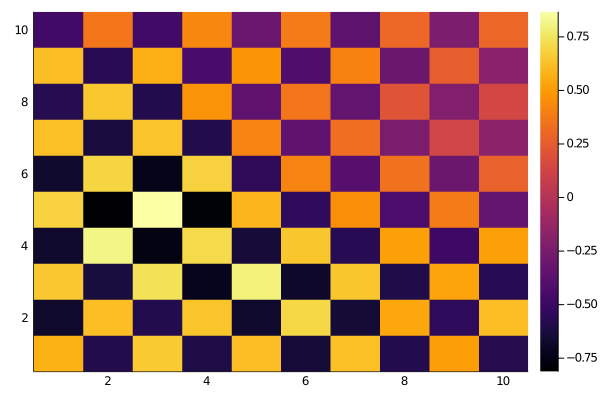

In [7]:
sz = TensorMap([1 0;0 -1],ℂ^2,ℂ^2)
heatmap(real.(expectation_value(chan,sz)))

There is another way to find the gradient, which is cryptically called the correlator approach. It should be slower but becomes exact in the limit of chi going to infinity. It can be used by calling

In [8]:
cor = correlator(env,ham);
(peps,cor,delta) = find_groundstate(peps,ham,optalg,cor);

┌ Info: LBFGS: initializing with f = -5353.691492162114, ‖∇f‖ = 2.3921e+01
└ @ OptimKit /home/maarten/.julia/packages/OptimKit/2iYQz/src/lbfgs.jl:34
┌ Info: trying stepsize 1.0
└ @ PEPSKit /home/maarten/PEPSKit.jl/src/algorithms/groundstate/optimhook.jl:101
┌ Info: trying stepsize 5.0
└ @ PEPSKit /home/maarten/PEPSKit.jl/src/algorithms/groundstate/optimhook.jl:101
┌ Info: trying stepsize 25.0
└ @ PEPSKit /home/maarten/PEPSKit.jl/src/algorithms/groundstate/optimhook.jl:101
┌ Info: trying stepsize 13.62268958044738
└ @ PEPSKit /home/maarten/PEPSKit.jl/src/algorithms/groundstate/optimhook.jl:101
┌ Info: LBFGS: iter    1: f = -5520.530859580222, ‖∇f‖ = 2.7520e+01, α = 1.36e+01, m = 0, nfg = 4
└ @ OptimKit /home/maarten/.julia/packages/OptimKit/2iYQz/src/lbfgs.jl:74
┌ Info: trying stepsize 1.0
└ @ PEPSKit /home/maarten/PEPSKit.jl/src/algorithms/groundstate/optimhook.jl:101
┌ Info: LBFGS: iter    2: f = -5671.164766470252, ‖∇f‖ = 2.4026e+01, α = 1.00e+00, m = 1, nfg = 1
└ @ OptimKit /home/ma

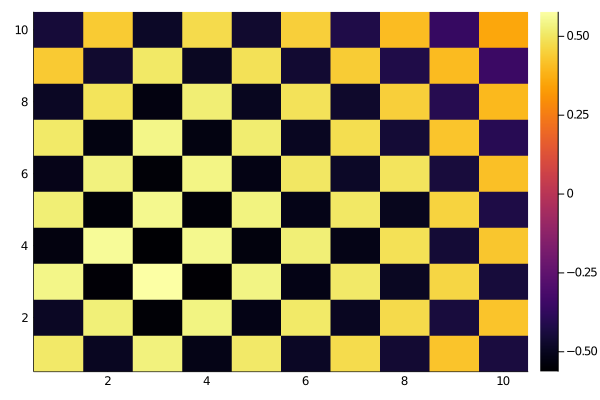

In [9]:
heatmap(real.(expectation_value(cor,sz)))